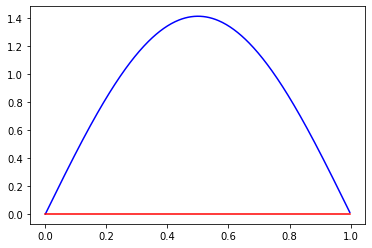

In [7]:
from wpspec import Quantum
from matplotlib import pyplot as plt
import numpy as np



params = {'quantum_state': 1, 'box_length': 1, 'v_offset': -1, 'grid_points': 400, 'system': 'pib'}
#parent = quantum(params)
#print(parent.grid_points)
wf = Quantum(params)
wf.dt = 0.01

#wf.eigenfunction()
#wf.eigenvalue()
#print(wf.E)
#wf.plot_eigenfunction()

#wf.derivatives()

#T_Psi = -0.5 * wf.Psi_pp
#wf.Psi *= wf.x
plt.plot(wf.x,  wf.Psi, 'blue', label='analytic')
plt.plot(wf.x,  wf.V, 'red', label='Potential')
#plt.plot(wf.x, T_Psi, 'r--', label='Derivative')
#plt.ylim(-1,1)
plt.show()


In [8]:

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


### parameters for plot
ax.set_xlim((0, wf.L))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line, line1,)

In [9]:
N_time = 300

# animation function. This is called sequentially  
def animate(i):
    
    line.set_data(wf.x, wf.Psi)
    line1.set_data(wf.x, wf.V)
    wf.split_op()
    return (line, line1,)
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

/Users/jay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
